## Project 7
In this project, you will implement the the clustering techniques that you've learned this week.

#### Step 1: Load the python libraries that you will need for this project

In [56]:
%matplotlib inline

import pandas as pd 
import matplotlib as plt
import numpy as np
import sklearn as sk 
from scipy.stats import pearsonr, normaltest
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn import metrics
import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning) 
import os 

os.chdir("/Users/patricksmith/Desktop")

#### Step 2: Examine your data

In [12]:
df_raw = pd.read_csv("airport_operations.csv")
df = df_raw.dropna() 
print df.head()

  airport  year  departures for metric computation  \
0     ABQ  2004                              53971   
1     ABQ  2005                              51829   
2     ABQ  2006                              49682   
3     ABQ  2007                              53255   
4     ABQ  2008                              49589   

   arrivals for metric computation  percent on-time gate departures  \
0                            53818                           0.8030   
1                            51877                           0.8140   
2                            51199                           0.7983   
3                            53611                           0.8005   
4                            49512                           0.8103   

   percent on-time airport departures  percent on-time gate arrivals  \
0                              0.7809                         0.7921   
1                              0.7922                         0.8001   
2                              0

## Intro: Write a problem statement / aim for this project

## Part 1: Create a PostgreSQL database

#### 1. Let's create a database where we can house our airport data

In [ ]:
# Load a new PSQL Bash and start server
psql -U postgres
psql -D /usr/local/pgsql/data # User's CD

# Create a new Database

createdb mydb

#### 2. Create tables for our data

In [ ]:
CREATE TABLE airport1 (
    airport varchar(80)
    year date, 
    departure_cancellations int
    arrival_cancellations int
);

CREATE TABLE airport2 (
    airport varchar(80),
    year date,
    average_gate_departure_delay int
    average_taxi_out_time int
);

#### 3. Load our csv files into tables

In [ ]:
COPY airport_cancels (airport, year, average_gate_departure_delay, average_taxi_out_time) FROM '.../airport_operations.csv' WITH (FORMAT CSV)
COPY airport_ops (airport, year, departure_cancellations, arrival_cancellations) FROM '.../airport_cancellations.csv' WITH (FORMAT CSV)

#### 4. Merge the Tables

In [ ]:
SELECT * from airport_ops
LEFT JOIN airport_cancels
ON
  airport_cancels.date = airport_ops.date AND airport_cancels.airport = airport_ops.airport

#### 5. Query the database for our intial data

In [ ]:
cur = conn.cursor()
cur.execute("""SELECT * FROM airport_ops""")
df = cur.fetchall()
print(df)

#### 6. What are the risks and assumptions of our data?

Answer: Since we do not know the source of the data, we cannot take the data quality for granted. Any correlation / relationship that we discover upon analyzing the data may be due to a discrepency in human error. Therefore, we assume that our data is accurate.

## Part 2: Exploratory Data Analysis

#### 2.1 Plot and Describe the Data

In [13]:
df.head(10)

airport  year  departures for metric computation  \
0     ABQ  2004                              53971   
1     ABQ  2005                              51829   
2     ABQ  2006                              49682   
3     ABQ  2007                              53255   
4     ABQ  2008                              49589   
5     ABQ  2009                              42550   
6     ABQ  2010                              42302   
7     ABQ  2011                              42283   
8     ABQ  2012                              39105   
9     ABQ  2013                              35277   

   arrivals for metric computation  percent on-time gate departures  \
0                            53818                           0.8030   
1                            51877                           0.8140   
2                            51199                           0.7983   
3                            53611                           0.8005   
4                            49512                           0.8103   
5                            42704                           0.8341   
6                            42169                           0.8144   
7                            42297                           0.8072   
8                            39107                           0.8219   
9                            34989                           0.7710   

   percent on-time airport departures  percent on-time gate arrivals  \
0                              0.7809                         0.7921   
1                              0.7922                         0.8001   
2                              0.7756                         0.7746   
3                              0.7704                         0.7647   
4                              0.7844                         0.7875   
5                              0.8147                         0.8224   
6                              0.7907                         0.8047   
7                              0.7758                         0.8022   
8                              0.7940                         0.8177   
9                              0.7402                         0.7554   

   average_gate_departure_delay  average_taxi_out_time  \
0                         10.38                   9.89   
1                          9.60                   9.79   
2                         10.84                   9.89   
3                         11.29                  10.34   
4                         10.79                  10.41   
5                          9.24                   9.88   
6                         10.25                   9.95   
7                         10.81                  10.50   
8                         10.55                  10.27   
9                         12.56                  10.77   

   average taxi out delay  average airport departure delay  \
0                    2.43                            12.10   
1                    2.29                            11.20   
2                    2.16                            12.33   
3                    2.40                            12.95   
4                    2.41                            12.32   
5                    1.89                            10.45   
6                    2.05                            11.58   
7                    2.51                            12.57   
8                    2.32                            12.11   
9                    2.64                            14.28   

   average airborne delay  average taxi in delay  average block delay  \
0                    2.46                   0.83                 2.55   
1                    2.26                   0.89                 2.34   
2                    2.12                   0.84                 2.66   
3                    2.19                   1.29                 3.06   
4                    1.82                   1.03                 2.79   
5                    1.74                   0.92                 1.98   

In [15]:
df.describe()

year  departures for metric computation  \
count   841.000000                         841.000000   
mean   2009.028537                      108257.063020   
std       3.156497                       98278.401526   
min    2004.000000                         261.000000   
25%    2006.000000                       37653.000000   
50%    2009.000000                       72043.000000   
75%    2012.000000                      162913.000000   
max    2014.000000                      491826.000000   

       arrivals for metric computation  percent on-time gate departures  \
count                       841.000000                       841.000000   
mean                     107815.561237                         0.764119   
std                       97916.908601                         0.093361   
min                         259.000000                         0.246700   
25%                       37502.000000                         0.745700   
50%                       71254.000000                         0.782500   
75%                      160775.000000                         0.809800   
max                      486799.000000                         0.909700   

       percent on-time airport departures  percent on-time gate arrivals  \
count                          841.000000                     841.000000   
mean                             0.714283                       0.754281   
std                              0.101271                       0.082302   
min                              0.245700                       0.324100   
25%                              0.684800                       0.737500   
50%                              0.737200                       0.768300   
75%                              0.772200                       0.796500   
max                              0.897400                       0.880300   

       average_gate_departure_delay  average_taxi_out_time  \
count                    841.000000             841.000000   
mean                      13.561403              13.703389   
std                        4.746563               3.792181   
min                        5.350000               7.040000   
25%                       10.910000              11.260000   
50%                       12.640000              12.810000   
75%                       14.950000              15.650000   
max                       40.800000              35.760000   

       average taxi out delay  average airport departure delay  \
count              841.000000                       841.000000   
mean                 3.519750                        16.249964   
std                  2.391278                         5.353012   
min                  0.000000                         6.290000   
25%                  2.210000                        12.950000   
50%                  2.990000                        15.220000   
75%                  4.080000                        17.940000   
max                 18.940000                        40.870000   

       average airborne delay  average taxi in delay  average block delay  \
count              841.000000             841.000000           841.000000   
mean                 2.921237               1.348894             3.330773   
std                  1.201453               0.882252             1.026872   
min                  0.950000               0.000000             1.230000   
25%                  2.050000               0.800000             2.630000   
50%                  2.650000               1.080000             3.160000   
75%                  3.620000               1.740000             3.860000   
max                  7.820000               6.180000             7.520000   

       average gate arrival delay  
count                  841.000000  
mean                    14.013222  
std                      4.482215  
min                      6.330000  
25%                     11.300000  
50%                     13.080000  
75%                     15.250000  
max

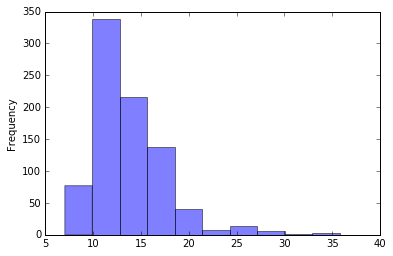

In [14]:
df['average_taxi_out_time'].plot(kind='hist', alpha=0.5)

{'boxes': [<matplotlib.lines.Line2D at 0x114799ed0>],
 'caps': [<matplotlib.lines.Line2D at 0x1147abe10>,
 'fliers': [<matplotlib.lines.Line2D at 0x116fb60d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1147b7ad0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1147ab110>,
  <matplotlib.lines.Line2D at 0x1147ab7d0>]}

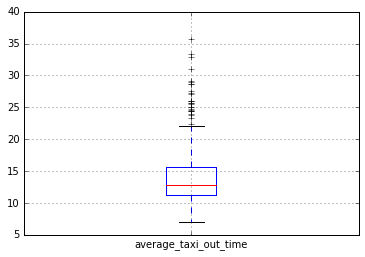

In [16]:
df.boxplot(column='average_taxi_out_time')

## Part 3: Data Mining

#### Are there any unique values?

In [20]:
##Check for Unique Values 

df.airport.unique()

array(['ABQ', 'ANC', 'ATL', 'AUS', 'BDL', 'BHM', 'BNA', 'BOS', 'BUF',
       'BUR', 'BWI', 'CLE', 'CLT', 'CVG', 'DAL', 'DAY', 'DCA', 'DEN',
       'DFW', 'DTW', 'EWR', 'FLL', 'GYY', 'HNL', 'HOU', 'HPN', 'IAD',
       'IAH', 'IND', 'ISP', 'JAX', 'JFK', 'LAS', 'LAX', 'LGA', 'LGB',
       'MCI', 'MCO', 'MDW', 'MEM', 'MHT', 'MIA', 'MKE', 'MSP', 'MSY',
       'OAK', 'OGG', 'OMA', 'ONT', 'ORD', 'OXR', 'PBI', 'PDX', 'PHL',
       'PHX', 'PIT', 'PSP', 'PVD', 'RDU', 'RFD', 'RSW', 'SAN', 'SAT',
       'SDF', 'SEA', 'SFO', 'SJC', 'SJU', 'SLC', 'SMF', 'SNA', 'STL',
       'SWF', 'TEB', 'TPA', 'TUS', 'VNY'], dtype=object)

#### 3.1 Create Dummy Variables

In [22]:
leAir = preprocessing.LabelEncoder()
df.airport = leAir.fit_transform(df.airport)

In [23]:
df.head()

airport  year  departures for metric computation  \
0        0  2004                              53971   
1        0  2005                              51829   
2        0  2006                              49682   
3        0  2007                              53255   
4        0  2008                              49589   

   arrivals for metric computation  percent on-time gate departures  \
0                            53818                           0.8030   
1                            51877                           0.8140   
2                            51199                           0.7983   
3                            53611                           0.8005   
4                            49512                           0.8103   

   percent on-time airport departures  percent on-time gate arrivals  \
0                              0.7809                         0.7921   
1                              0.7922                         0.8001   
2                              0.7756                         0.7746   
3                              0.7704                         0.7647   
4                              0.7844                         0.7875   

   average_gate_departure_delay  average_taxi_out_time  \
0                         10.38                   9.89   
1                          9.60                   9.79   
2                         10.84                   9.89   
3                         11.29                  10.34   
4                         10.79                  10.41   

   average taxi out delay  average airport departure delay  \
0                    2.43                            12.10   
1                    2.29                            11.20   
2                    2.16                            12.33   
3                    2.40                            12.95   
4                    2.41                            12.32   

   average airborne delay  average taxi in delay  average block delay  \
0                    2.46                   0.83                 2.55   
1                    2.26                   0.89                 2.34   
2                    2.12                   0.84                 2.66   
3                    2.19                   1.29                 3.06   
4                    1.82                   1.03                 2.79   

   average gate arrival delay  
0                       10.87  
1                       10.24  
2                       11.82  
3                       12.71  
4                       11.48

#### 3.2 Format the data

In [30]:
taxi = df['average_taxi_out_time']
gate = df['average_gate_departure_delay']
year = df['year']
taxDel = df['average taxi out delay']
airDel = df['average airborne delay']

In [40]:
del df['departures for metric computation']
del df['arrivals for metric computation']

## Part 4: Refine the Data

#### 4.1 Confirm that the dataset has a normal distribution. How can you tell?

In [26]:
normaltest(df)

NormaltestResult(statistic=array([ 575.01770642,  665.19302691,  237.59201855,  238.32781162,
        588.92237458,  349.00303274,  505.87440654,  497.1524945 ,
        313.56548118,  446.67084588,  290.37670247,  128.3619001 ,
        233.00536226,  115.41368827,  366.86988366]), pvalue=array([  1.36927775e-125,   3.59062050e-145,   2.55592849e-052,
         1.76918506e-052,   1.30957756e-128,   1.64041736e-076,
         1.41503881e-110,   1.10842800e-108,   8.13056834e-069,
         1.01544921e-097,   8.82064253e-064,   1.33834337e-028,
         2.53237757e-051,   8.67433166e-026,   2.16379930e-080]))

In [27]:
df_normalized = preprocessing.normalize(df, norm='l2')

#### 4.2 Find correlations in the data

In [35]:
# truncate arrays to same length
taxi1 = taxi[0:806]
gate1 = gate[0:806]
year1 = year[0:806]
taxDel1 = taxDel[0:806]
airDel1 = taxDel[0:806]

In [36]:
# conduct correlations

pearsonr(taxi1, airDel1)

(0.91801865809306404, 0.0)

In [37]:
pearsonr(year1, airDel1)

(-0.15556456922513523, 9.1355875208020621e-06)

In [38]:
pearsonr(gate1, airDel1)

(0.099734112232175001, 0.0045949201809180997)

In [39]:
pearsonr(taxDel1, airDel1)

(1.0, 0.0)

#### 4.3 What is the p-value? What does this mean?

The p-value is our measure of the strength of the relationship between x and y. It measures the how likely it is that the null hypothesis is true; in the case of a correlation, how likely it is that two arrays between anaylized are not related.


#### 4.4 What is the value of understanding correlations before PCA?¶

Answer: Highly correlated variables contribute to a common underlying factor in PCA, the principal componant or eigenvector, which helps us further understand patterns in the data.

## Part 5: Perform a PCA and Present Findings

#### 5.1 Define your "X" and "Y" variables

In [41]:
x = df.ix[:,1:11].values
y = df.ix[:,0].values

#### 5.2 Standardize the x values

In [45]:
xStand = preprocessing.StandardScaler().fit_transform(x)

#### 5.3 Create the covariance matrix

In [46]:
covMat = np.cov(xStand.T)
eigenValues, eigenVectors = np.linalg.eig(covMat)

#### Check the Eigenvalues and Eigenvectors

In [47]:
print(eigenValues)

[  5.03850464e+00   2.84278948e+00   1.10912977e+00   4.95563116e-01
   2.85130599e-01   1.01298698e-01   7.84440728e-02   2.40718960e-03
   7.10318336e-04   5.79268661e-02]


In [48]:
print(eigenVectors)

[[  4.85934738e-02   9.39501573e-02   8.92618253e-01   3.82768225e-01
   -1.44557643e-01  -4.64224442e-02  -1.47122075e-01  -2.86967825e-02
   -3.52561171e-03   6.22157147e-04]
 [  3.88231784e-01  -2.73100958e-01  -2.78271153e-02   1.19600090e-01
    1.14178182e-01  -1.90826901e-01  -7.76193589e-02   6.60968818e-01
   -2.13936073e-01   4.70625826e-01]
 [  4.37300524e-01  -2.73440964e-02  -6.29754509e-02   5.53820487e-02
   -5.98655094e-02  -3.53181280e-01   1.75404286e-01  -6.12575631e-01
    2.21074502e-01   4.66665914e-01]
 [  3.82783585e-01  -2.48680213e-01   4.88135362e-02   9.33515836e-02
   -1.79922228e-01   7.33924448e-01   4.55579251e-01  -1.92920270e-02
   -4.86044107e-03  -3.96514173e-02]
 [ -4.08379829e-01   2.08765889e-01   8.61203963e-02  -8.27023933e-02
   -6.13885244e-02   4.90137223e-02   3.89486338e-01  -1.11685026e-01
   -6.32792683e-01   4.52344650e-01]
 [ -1.87251623e-01  -5.02335044e-01   1.29605484e-01   1.44287343e-01
    3.40379406e-01  -3.81839083e-01   5.62536

#### 5.4 Print the Eigenpairs

In [50]:
eigenPairs = [(np.abs(eigenValues[i]), eigenVectors[:,i]) for i in range(len(eigenValues))]
eigenPairs.sort()
eigenPairs.reverse()
for i in eigenPairs:
    print(i[0])

5.0385046428
2.84278948456
1.10912977493
0.495563115798
0.285130599231
0.101298697794
0.0784440727736
0.0579268660912
0.00240718959766
0.00071031833636


#### 5.5 Calculate the explained variance

In [51]:
totalEigen = sum(eigenValues)
varExpl = [(i / totalEigen)*100 for i in sorted(eigenValues, reverse=True)]

In [52]:
print(varExpl)

[50.325135552313306, 28.394092354657758, 11.078109523676074, 4.94973861201417, 2.8479156165765693, 1.0117824749950755, 0.78350798014086165, 0.57857987534585842, 0.0240432730325136, 0.0070947372478268444]


In [53]:
cvarex = np.cumsum(varExpl)

In [54]:
print(cvarex)

[  50.32513555   78.71922791   89.79733743   94.74707604   97.59499166
   98.60677413   99.39028211   99.96886199   99.99290526  100.        ]


#### 5.6 Conduct the PCA

In [58]:
PCA_A = PCA(n_components=3)
Y = PCA_A.fit_transform(xStand)

In [63]:
print Y

[[ 1.58117113 -0.59746459  1.71802216]
 [ 1.92626384 -0.58767242  1.40512887]
 [ 1.52870312 -0.86351165  1.04784852]
 ..., 
 [-6.43289819 -4.53156353 -0.84816428]
 [-6.10482769 -4.67276951 -1.585994  ]
 [-6.2812065  -4.50947294 -1.66017099]]


#### 5.7 Create a dataframe from the PCA results

In [64]:
Ydf = pd.DataFrame(Y, columns=["PC1", "PC2", "PCA3"])

Now, create a new dataframe that uses the airport and year from the original set and join the PCA results with it to form a new set

In [66]:
airports2 = df[['airport', 'year']]

In [67]:
airport_pca = airports2.join(Ydf, on=None, how='left')

#### 5.8 Graph the results to a new feature space

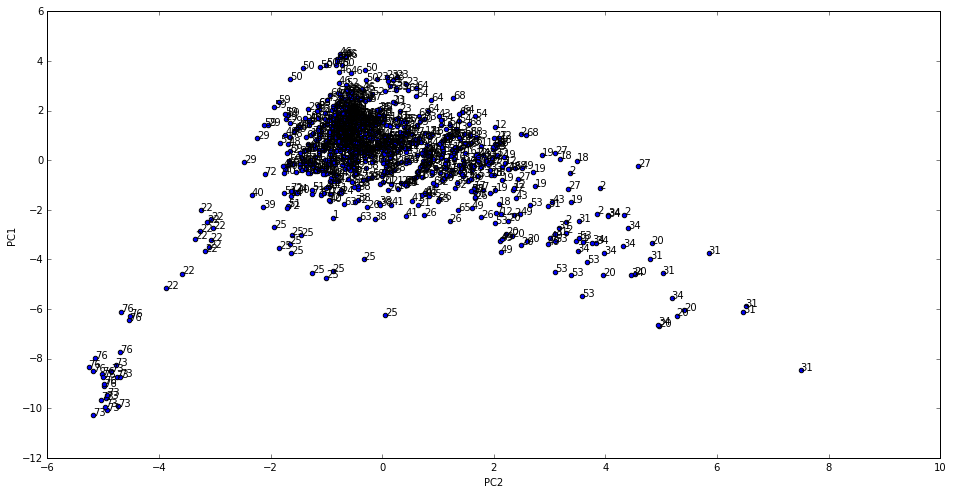

In [70]:
graph = airport_pca.plot(kind='scatter', x='PC2', y='PC1', figsize=(16,8))

for i, airport in enumerate(df['airport']):
    graph.annotate(airport, (airport_pca.iloc[i].PC2, airport_pca.iloc[i].PC1))

#### 5.9 Write an analysis plan of your findings

Create a writeup on the interpretation of findings including an executive summary with conclusions and next steps

## Part 6: Copy your Database to AWS

Make sure to properly document all of the features of your dataset

In [ ]:
## Create a PostgreSQL database on AWS using the Amazon database wizard on AWS

## Connect to the DB
psql --host=<DB instance endpoint> --port=<port> --username=<master user name> --password --dbname=<database name> 

## Transfer 
select * into newtable from airport_ops

## Bonus:

#### 1. Conduct the analysis again using different variables from the airport_operations.csv dataset

#### 2. Create visualization of your data using the ggplot features of matplotlib